<a href="https://colab.research.google.com/github/fedhere/MLTSA22_FBianco/blob/main/CodeExamples/timeSeriesClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# population trends by country through clustering analysis

In [ ]:
import pandas as pd
from sklearn import preprocessing
import pylab as pl
from sklearn import cluster
import numpy as np
pl.rcParams['font.size'] = 18

# Data ingestion

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
#commnting cause already done
#mkdir drive/My\ Drive/dsps


mkdir: cannot create directory ‘drive/My Drive/dsps’: File exists


In [ ]:
cd drive/My\ Drive/dsps

/content/drive/My Drive/dsps


In [ ]:
#commenting cause already done
#!wget http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel

In [ ]:
#reding in simply to see how the data look
pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]
      ).set_index("Data Source")

,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1

In [ ]:
#reading in with appropriuate rules. Note the data name. That is BAD! I should give it a meaningful name
datain = pd.read_excel("SP.POP.TOTL?downloadformat=excel", usecols=[0] + 
              list(range(4,100)), skiprows=[1,2]
      ).set_index("Data Source")
datain.columns = datain.iloc[0]
datain.drop("Country Name", inplace=True)
datain

Country Name,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,1990.0,1991.0,1992.0,1993.0,1994.0,1995.0,1996.0,1997.0,1998.0,1999.0,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Data Source,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aruba,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,59063.0,59440.0,59840.0,60243.0,60528.0,60657.0,60586.0,60366.0,60103.0,59980.0,60096.0,60567.0,61345.0,62201.0,62836.0,63026.0,62644.0,61833.0,61079.0,61032.0,62149.0,64622.0,68235.0,72504.0,76700.0,80324.0,83200.0,85451.0,87277.0,89005.0,90853.0,92898.0,94992.0,97017.0,98737.0,100031.0,100834.0,101222.0,101358.0,101455.0,101669.0,102046.0,102560.0,103159.0,103774.0,104341.0,104872.0,105366.0,105845.0,NaN
Afghanistan,8996973.0,9169410.0,9351441.0,9543205.0,9744781.0,9956320.0,10174836.0,10399926.0,10637063.0,10893776.0,11173642.0,11475445.0,11791215.0,12108963.0,12412950.0,12689160.0,12943093.0,13171306.0,13341198.0,13411056.0,13356511.0,13171673.0,12882528.0,12537730.0,12204292.0,11938208.0,11736179.0,11604534.0,11618005.0,11868877.0,12412308.0,13299017.0,14485546.0,15816603.0,17075727.0,18110657.0,18853437.0,19357126.0,19737765.0,20170844.0,20779953.0,21606988.0,22600770.0,23680871.0,24726684.0,25654277.0,26433049.0,27100536.0,27722276.0,28394813.0,29185507.0,30117413.0,31161376.0,32269589.0,33370794.0,34413603.0,35383128.0,36296400.0,37172386.0,NaN
Angola,5454933.0,5531472.0,5608539.0,5679458.0,5735044.0,5770570.0,5781214.0,5774243.0,5771652.0,5803254.0,5890365.0,6040777.0,6248552.0,6496962.0,6761380.0,7024000.0,7279509.0,7533735.0,7790707.0,8058067.0,8341289.0,8640446.0,8952950.0,9278096.0,9614754.0,9961997.0,10320111.0,10689250.0,11068050.0,11454777.0,11848386.0,12248901.0,12657366.0,13075049.0,13503747.0,13945206.0,14400719.0,14871570.0,15359601.0,15866869.0,16395473.0,16945753.0,17519417.0,18121479.0,18758145.0,19433602.0,20149901.0,20905363.0,21695634.0,22514281.0,23356246.0,24220661.0,25107931.0,26015780.0,26941779.0,27884381.0,28842484.0,29816748.0,30809762.0,NaN
Albania,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,2135479.0,2187853.0,2243126.0,2296752.0,2350124.0,2404831.0,2458526.0,2513546.0,2566266.0,2617832.0,2671997.0,2726056.0,2784278.0,2843960.0,2904429.0,2964762.0,3022635.0,3083605.0,3142336.0,3227943.0,3286542.0,3266790.0,3247039.0,3227287.0,3207536.0,3187784.0,3168033.0,3148281.0,3128530.0,3108778.0,3089027.0,3060173.0,3051010.0,3039616.0,3026939.0,3011487.0,2992547.0,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2873457.0,2866376.0,NaN
Andorra,13411.0,14375.0,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,24276.0,25559.0,26892.0,28232.0,29520.0,30705.0,31777.0,32771.0,33737.0,34818.0,36067.0,37500.0,39114.0,40867.0,42706.0,44600.0,46517.0,48455.0,50434.0,52448.0,54509.0,56671.0,58888.0,60971.0,62677.0,63850.0,64360.0,64327.0,64142.0,64370.0,65390.0,67341.0,70049.0,73182.0,76244.0,78867.0,80993.0,82684.0,83862.0,84463.0,84449.0,83747.0,82427.0,80774.0,79213.0,78011.0,77297.0,77001.0,77006.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Kosovo,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,1106000.0,1135000.0,1163000.0,1191000.0,1219000.0,1247000.0,1278000.0,1308000.0,1339000.0,1369000.0,1400000.0,1430000.0,1460000.0,1491000.0,1521000.0,1552000.0,1582000.0,1614000.0,1647000.0,1682000.0,1717000.0,1753000.0,1791000.0,1827000.0,1862000.0,1898000.0,1932000.0,1965000.0,1997000.0,2029000.0,2059000.0,20

#  TASK Ia


In [ ]:
print("there are {} countries and {} time stamps in the data".
      format(*datain.shape))

there are 264 countries and 60 time stamps in the data


Cleaning the data from NaNs

In [ ]:
#cleaned dataset timestamps
datain = datain.dropna(axis=1, how='all')
(datain.isna().sum()>0).sum()

59

In [ ]:
datain = datain.dropna(axis=0)

In [ ]:
(datain.isna().sum()>0).sum()

0

#  TASK Ib

# print the number of countries and the length of the timeline

In [ ]:
print("there are {} countries and {} time stamps in the cleaned data".
      format(*datain.shape))

there are 258 countries and 59 time stamps in the cleaned data


# TASK II

In [ ]:
# visualizing the raw data. This is NOT a good plot choice, but it tells me that the data is diverse. 

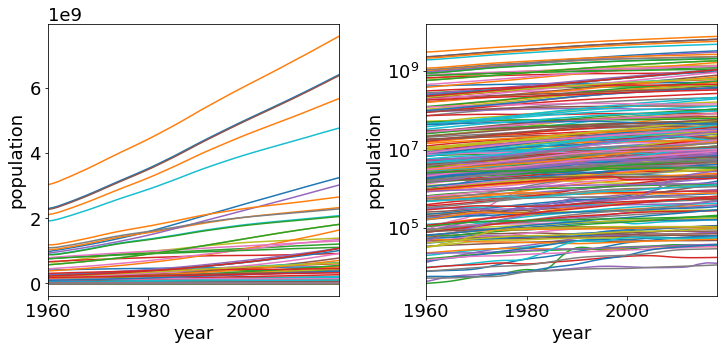

In [ ]:
fig, axs = pl.subplots(nrows=1, ncols=2, figsize=(12,5))
fig.subplots_adjust(wspace=0.3)
ax1 = datain.T.plot(legend=False, ax=axs[0]);
ax1.set_xlabel("year")
ax1.set_ylabel("population");
ax2 = datain.T.plot(legend=False, ax=axs[1], logy=True);
ax2.set_xlabel("year")
ax2.set_ylabel("population");


Figure 1: plot of  population time series since 1960 through 2018 for all countries vith valid time series (no missing data) as sourced from the worldbank dataset (accessed 10/14/2019 http://api.worldbank.org/v2/en/indicator/SP.POP.TOTL?downloadformat=excel) in natural scale on the left and y-log scale on the right. The time series have a different mean  but all show a general increasing trend.

# TASK III

# Preprocessing
These are time series so *they cannot be whitened*
They should be scaled along the observation axis instead

In [ ]:
X = preprocessing.scale(datain, axis=1)
X.mean(axis=1).shape, X.mean(axis=1)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:172: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


((258,),
 array([ 8.05382126e-16,  4.21508403e-16,  4.81723889e-16, -6.76483351e-16,
        -3.38712109e-16, -6.51079943e-16, -1.20430972e-16,  5.34412439e-16,
         6.61664697e-16, -3.38712109e-16,  6.39789540e-16,  5.45702843e-16,
        -6.17208732e-16, -6.13445264e-16,  7.07531961e-16,  5.26885503e-17,
        -6.62370347e-16,  7.37639704e-16, -5.90864457e-16,  6.02154861e-17,
        -7.07531961e-16, -6.24735668e-16, -2.25808073e-17, -7.99736925e-18,
         4.51616146e-17, -6.20972200e-16, -7.67747448e-16, -6.43553007e-16,
        -1.01613633e-15,  7.86564787e-16,  6.02154861e-16, -2.40861944e-16,
        -7.15058897e-16, -1.03871713e-15, -9.78501649e-17, -6.02154861e-17,
         8.46780273e-16,  4.17744935e-16,  7.45166640e-16,  3.53765981e-16,
        -2.10754201e-16,  4.59143081e-16, -7.52693576e-16, -2.78496623e-16,
         1.80646458e-16, -4.13981467e-16,  2.14517669e-16, -7.60220512e-16,
        -8.61834145e-16,  3.01077430e-17,  9.18286163e-16,  6.05918329e-16,
   

In [ ]:
X.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

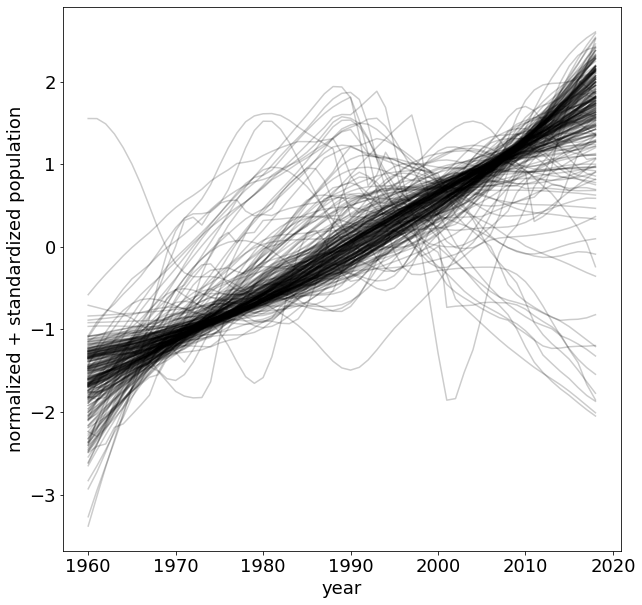

In [ ]:
pl.figure(figsize=(10,10))
pl.plot(X.T, c='k', alpha=0.2);
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");


Figure 2: plot of standardized population time series since 1960 through 2018 for all data plotted in Figure 1. This plot reveals a dominant increasing trend with some variations in time behavior. 

# PART IV

# clustering

# cluster the data in 2 to 10 clusters and print the total variance for each cluster. 
# Plot the total variance as a function of number of clusters

i.c. variance with 1 clusters 2498.20
i.c. variance with 2 clusters 1154.31
i.c. variance with 3 clusters 796.32
i.c. variance with 4 clusters 596.19
i.c. variance with 5 clusters 517.50
i.c. variance with 6 clusters 443.91
i.c. variance with 7 clusters 394.71
i.c. variance with 8 clusters 353.70
i.c. variance with 9 clusters 323.31


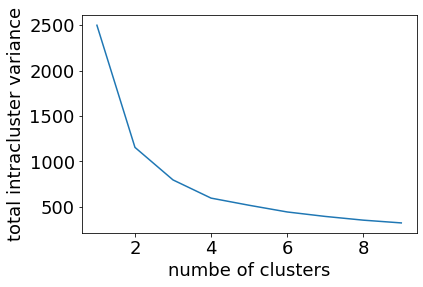

In [ ]:
#making an elbow plot to choose the right number of clusters
nmaxc = 10
nc = []
for i in range(1, nmaxc):
  c = cluster.k_means(X, i)
  nc.append(c[2])
  print("i.c. variance with {} clusters {:.2f}".format(i, c[2]))
pl.plot(range(1, nmaxc), nc)

pl.xlabel("numbe of clusters")
pl.ylabel("total intracluster variance");

Figure 3: "Elbow plot" of k-means clustering of the time series in Figure 2. The plotted line represents the intracluster variance of the clustered data as a function of cluster numbers. While lower values are better, this is the target function of the algorithm, so the intracluster variance is bound to decrease with the number of cluster. A sharpe decrease in the slope, an "elbow" would indicate a good stopping point for clustering, but this plot does not show an "elbow". 

In [ ]:
# making sure I am clustering along the right axis: 
# each cluster center shoul de as long as the timeline: 59
X.shape, c[0].shape

((258, 59), (9, 59))

# what is the appropriate number of clusters?


There is no clear answer from the elbow plot (Figure 3). In this case, a small number of clusters is preferable. We choose 4, although 3 or even 2 would be just as good a choice. 

# TASK V

pick some number of clusters and
- cluster the time series with k-means and the chosen number of cluster
- print the number of time series in each cluster
- for each cluster plot the cluster center and each time series that belong to that center in the same plot
- print the names of the countries in the smallest cluster

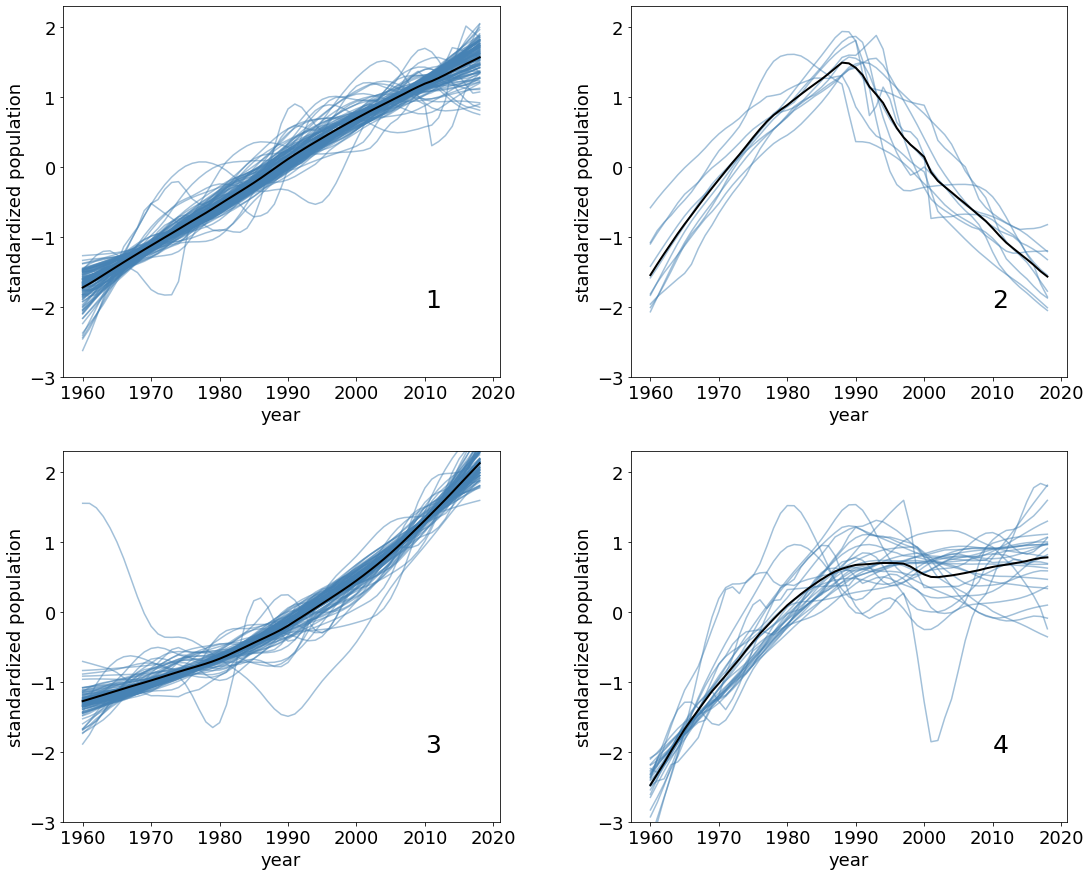

In [ ]:
#clustering
c = cluster.k_means(X, 4, random_state=333)
fig = pl.figure(figsize=(18,15))
ax = fig.subplots(nrows=2, ncols=2)
ax = ax.flatten()
for i in range(4):
  ax[i].plot(X[c[1] == i].T, c='SteelBlue', alpha=0.5)
  ax[i].plot(c[0][i], lw=2, c='k')
  ax[i].set_xlabel("year")
  ax[i].set_xticks(ticks=range(0, 70, 10))
  ax[i].set_xticklabels(["%d"%i for i in range(1960, 2030, 10)])
  ax[i].text(50, -2, i+1, fontsize=25)
  ax[i].set_ylim(-3, 2.3)

  ax[i].set_ylabel("standardized population");
pl.subplots_adjust(wspace=0.3)


Figure 4: The time series of world-wide population by country clustered in 4 clusters based on the shape of their standardize version. The cluster centers are shown as a black line, the individual time series are shown in blue. Four distinct behaniors are visible. Cluster 1, which is the larges cluster) shows a constant growth, cluster 2 shows an initial grows followed by a significant drop starting around 1990. Cluster 3, second largest, shows an increasing (slightly) growth rate; some outliers are visible, particularly a time series with an initial population drop throug the early 1990s. Cluster 4 shows an initial frows and a stabilization of the population starting in the late 1980s. Soe outliers are seen: especially a country with a popoulation drop in the 2020s.

In [ ]:
for i in range(4):
  print ("number of elements in cluster {:d}: {:d}".format(
      i+1, np.sum(c[1] == i)))

number of elements in cluster 1: 123
number of elements in cluster 2: 10
number of elements in cluster 3: 99
number of elements in cluster 4: 26


['Bulgaria',
 'Bosnia and Herzegovina',
 'Estonia',
 'Georgia',
 'Croatia',
 'Hungary',
 'Lithuania',
 'Latvia',
 'Romania',
 'Ukraine']

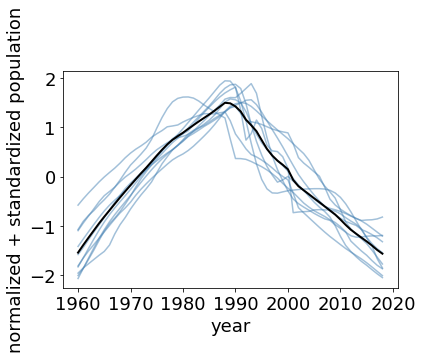

In [ ]:
# one cluster has as ignificant drop 30 years into the timeline. 
pl.plot(X[c[1] == 1].T, c='SteelBlue', alpha=0.5)
pl.plot(c[0][1], lw=2, c='k')
pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");
[datain.index[i] for i in np.where(c[1] == 1)[0]]


Figure 5: All elements of cluster 2 are eastern European countries. A brief internet search leads to a common cause for this population drop (which continues to this day)

Between 1991-2015, the Baltic States and Bulgaria lost between 16% and 26% of their populations.
https://globalriskinsights.com/2019/10/population-decline-in-central-and-eastern-europe/

# Extra

In [ ]:
# outlier in cluster 3
distances = np.array([np.sum((c[0][2] - ts)**2) for ts in X[c[1]==2]])
outliers = distances.argsort()

outliers

array([36, 54, 51, 71, 18, 81, 83, 92, 24, 16, 64, 93, 60, 94,  9, 30, 76,
       12, 17, 90, 28, 50, 31, 29, 41, 98, 25, 10, 39, 19, 37, 44, 26, 96,
       59, 78, 68, 70, 38,  2, 97, 77, 61,  7, 91, 34, 85, 46, 69, 43, 75,
       89, 55, 63,  3, 35, 53, 57, 84, 23, 42, 22, 79, 15, 74, 21, 13, 65,
       95, 62, 56, 20, 52, 80, 66, 14, 11, 88, 45, 86, 49, 40,  6, 67, 48,
       87, 82,  8, 27, 73,  1, 32,  5, 58,  4,  0, 33, 72, 47])

'St. Kitts and Nevis'

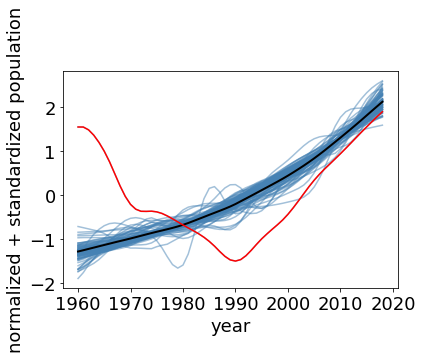

In [ ]:
pl.plot(X[c[1]==2].T, c='SteelBlue', alpha=0.5)
pl.plot(c[0][2], lw=2, c='k')
pl.plot(X[c[1]==2][outliers[-1]], c='r')
pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");
datain.index[c[1]==2][outliers[-1]] 


Figure 6: the main outlier in population growth is St. Kitts and Nevis, which is a very small Caribean island with only 40,834 ‎(1990) inhabitants.

In [ ]:
# outlier in cluster 3
distances = np.array([np.sum((c[0][2] - ts)**2) for ts in X[c[1]==3]])
outliers = distances.argsort()

outliers

array([21,  4, 20,  8, 19, 14, 15, 11, 22, 23, 12,  6, 16,  9, 17, 25, 24,
       13, 18,  0, 10,  5,  2,  1,  3,  7])

'Dominica'

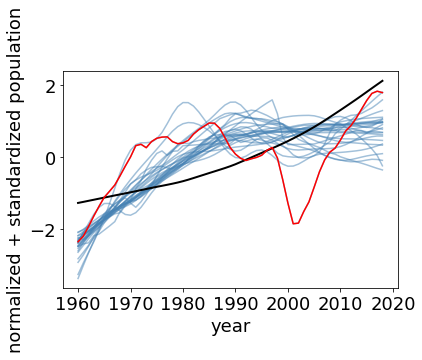

In [ ]:
pl.plot(X[c[1]==3].T, c='SteelBlue', alpha=0.5)
pl.plot(c[0][2], lw=2, c='k')

pl.plot(X[c[1]==3][outliers[-5]], c='r')


pl.xticks(ticks=range(0, 70, 10), labels=["%d"%i for i in range(1960, 2030, 10)])
pl.xlabel("year")
pl.xticks(ticks=range(0, 70, 10), 
          labels=["%d"%i for i in range(1960, 2030, 10)])

pl.ylabel("normalized + standardized population");
datain.index[c[1]==3][outliers[-1]] 


Figure 7: an interesting outlier in cluter 4 is Dominica, also a small Carribean island. In the late 90s-early 2000s Dominica faced two hurrican, a widespred economic crisis, and an earthquake, and significant government changed. However, higher variance in population changes is expected in coutries with smaller overall population simply due to number statistics.

